In [2]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
from src.config import Config
from os.path import join
from src.helper import plot_idx, plot_batch_images

In [3]:
%matplotlib inline
plt.style.use('ggplot')

In [4]:
original_data_path = join(Config.interim_data_path, 'original')

In [5]:
original_annotation_df = pd.read_csv(join(original_data_path, Config.default_annotation_file_name))
original_annotation_df.head()

,image,height,weight,BMI
0,f_001,1.55,61.0,25.390219
1,f_002,1.76,85.0,27.440599
2,f_003,1.78,56.0,17.674536
3,f_004,1.63,63.0,23.711845
4,f_005,1.76,54.0,17.432851


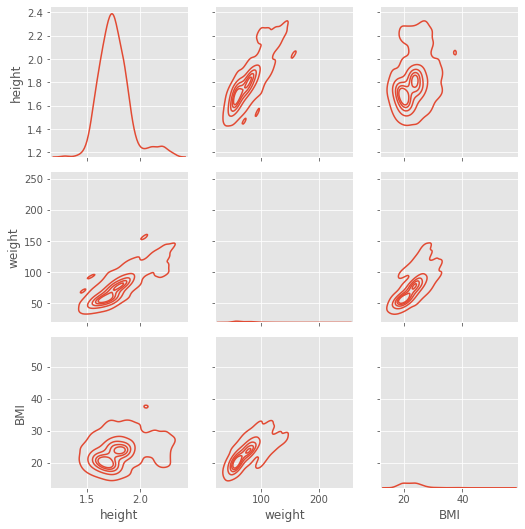

In [6]:
sample = original_annotation_df[['height','weight','BMI']]
g = sns.PairGrid(sample);
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

Text(0, 0.5, 'Frequency')

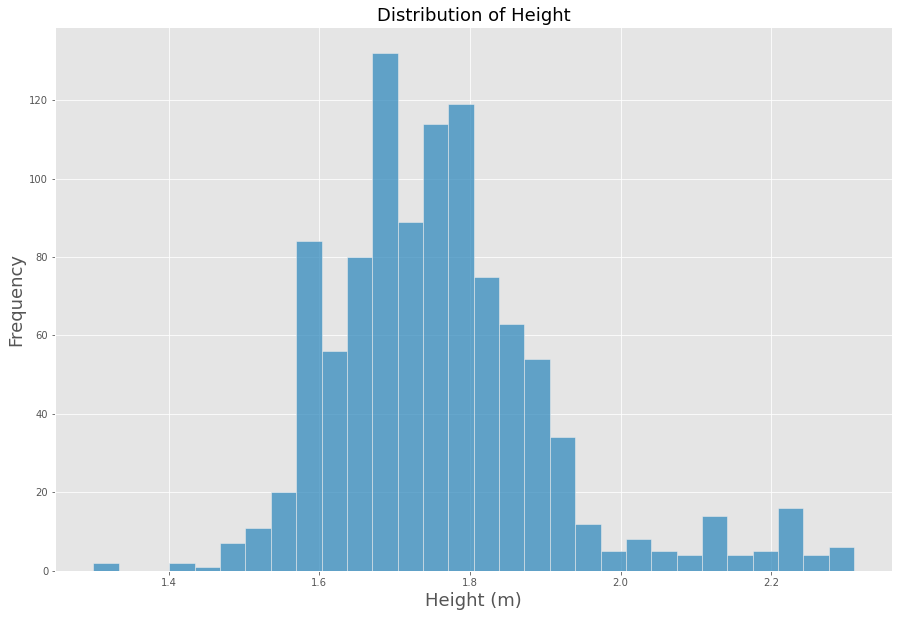

In [7]:
plt.figure(figsize=(15, 10))
sns.histplot(sample.height)
plt.title('Distribution of Height', size=18)
plt.xlabel('Height (m)', size=18)
plt.ylabel('Frequency', size=18)

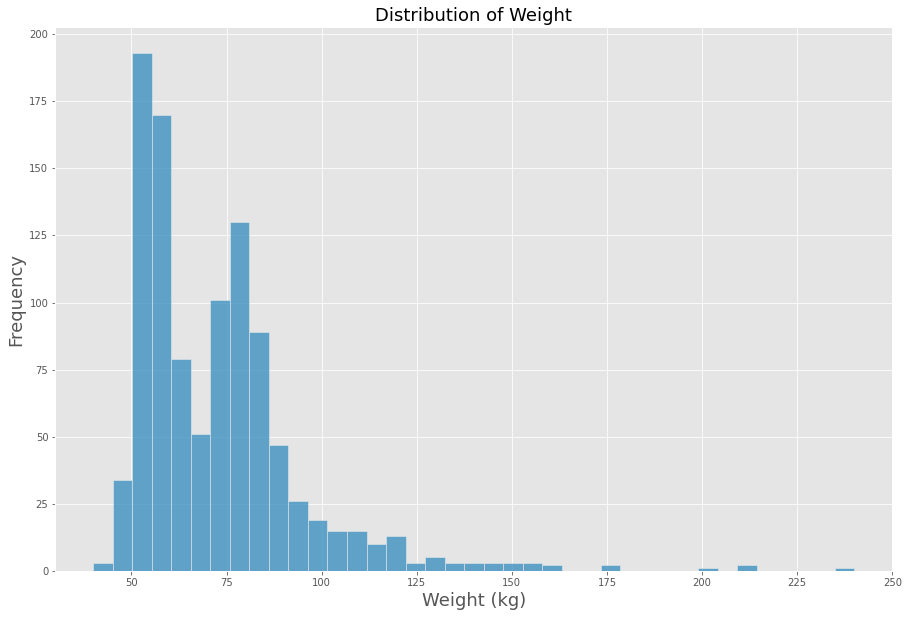

In [8]:
plt.figure(figsize=(15, 10))
sns.histplot(sample.weight)
plt.title('Distribution of Weight', size=18)
plt.xlabel('Weight (kg)', size=18)
plt.ylabel('Frequency', size=18);

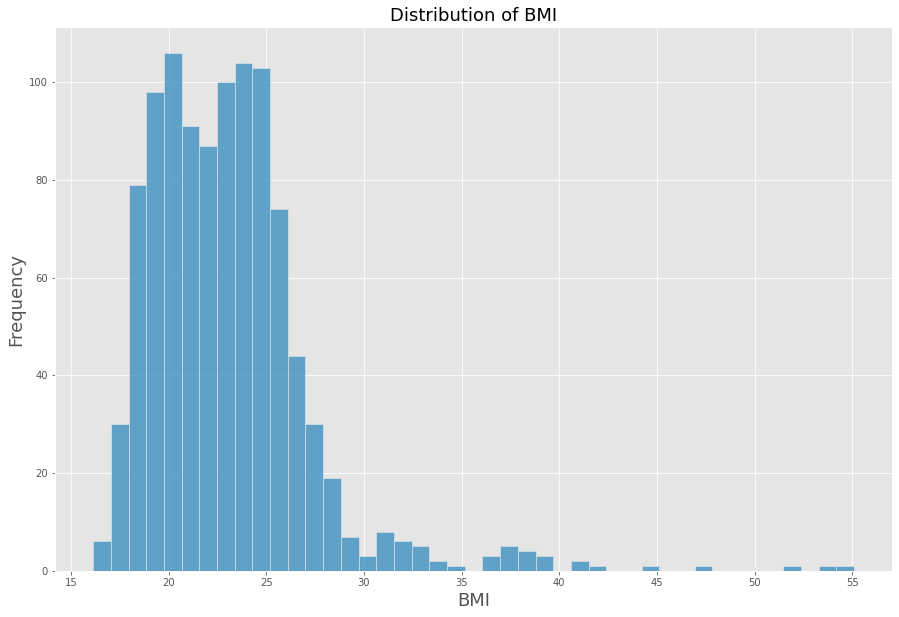

In [9]:
plt.figure(figsize=(15, 10))
sns.histplot(sample.BMI)
plt.title('Distribution of BMI', size=18)
plt.xlabel('BMI', size=18)
plt.ylabel('Frequency', size=18);

In [10]:
all_files = glob.glob(join(original_data_path, 'data') + '/*')
all_jpgs = sorted([img for img in all_files if ".jpg" in img or ".jpeg" in img or "JPG" in img])
print(f"Total {len(all_jpgs)} photos in original dataset.")

Total 1026 photos in original dataset.


In [11]:
id_path = [image for image in all_jpgs ]
image_df = pd.DataFrame(id_path, columns=['path'])
full_df = image_df.merge(original_annotation_df, left_index=True, right_index=True)
full_df.head()

,path,image,height,weight,BMI
0,/home/casey/Desktop/f2b/data/interim/original/...,f_001,1.55,61.0,25.390219
1,/home/casey/Desktop/f2b/data/interim/original/...,f_002,1.76,85.0,27.440599
2,/home/casey/Desktop/f2b/data/interim/original/...,f_003,1.78,56.0,17.674536
3,/home/casey/Desktop/f2b/data/interim/original/...,f_004,1.63,63.0,23.711845
4,/home/casey/Desktop/f2b/data/interim/original/...,f_005,1.76,54.0,17.432851


In [ ]:
plot_idx(randint(0, len(full_df)), full_df)

In [14]:
plot_batch_images(batch_size=Config.batch_size, dataframe=full_df)